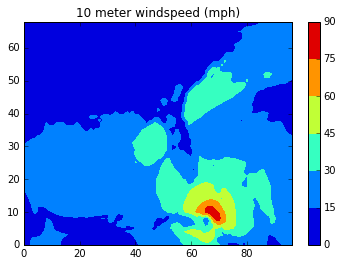

varname: T2 not found in dataset: wrfoutdiagnostics_d01_2017-09-09_12:00:00


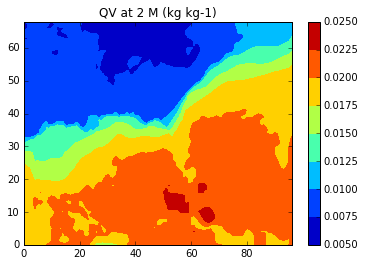

varname: DON not found in dataset: wrfoutdiagnostics_d01_2017-09-09_12:00:00
Failed to open: /this/is/a/bogus/dataset.nc


In [5]:
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
import os


def create_wind_dignostics(wrfout_filepath=None, wrfdiag_filepath=None):
    try:
        orig_dataset = netCDF4.Dataset(wrfout_filepath, 'r')
    
    except:
        print("Failed to open: " + wrfout_filepath)
        
    try:
        #if newfile already exits, remove it to avoid potential
        #permission problems
        if os.path.isfile(wrfdiag_filepath):
            os.remove(wrfdiag_filepath)
        diag_dataset = netCDF4.Dataset(wrfdiag_filepath, 'w', clobber=True)

        #write the same dimensions to the diagnostic dataset
        for the_key in orig_dataset.dimensions.keys():
            the_value = orig_dataset.dimensions[the_key].size
            the_name = orig_dataset.dimensions[the_key].name
            diag_dataset.createDimension(the_name, the_value)

        #write the global attributes to diagnorstic file
        for attr in orig_dataset.ncattrs():
            attr_value = getattr(orig_dataset, attr)
            setattr(diag_dataset, attr, attr_value)

        # Create the new variable WS10 (miles/hour) for U10 & V10 (m/sec)
        # Let's get U10 & V0
        U10 = orig_dataset.variables['U10'][:]
        V10 = orig_dataset.variables['V10'][:]

        #Create WS10
        WS10 = (np.sqrt(U10**2 + V10**2)) *2.2369 #convert the units to mph

        # Write it, along with attributes, to the diagnostic field
        ws10 = diag_dataset.createVariable('WS10', np.float32,
                                           ('Time', 'south_north',
                                            'west_east'))
        ws10.units = "mph"
        ws10.description = "10 meter windspeed"
        ws10[:] = WS10
        diag_dataset.close()
        orig_dataset.close()
    except:
        print("Failed to open: " + wrfout_filepath)
          
    
#verify variables
def plot_wrf2dvar(wrfnc_filepath=None, varname=None):
    var = None
    try:
        dataset = netCDF4.Dataset(wrfnc_filepath, 'r')
        try:
            var = dataset.variables[varname]
            varNpArray = var[:]
            plt.contourf(varNpArray[0,:,:])
            plt.title(var.description +" (" + var.units + ")")
            plt.colorbar()
            plt.show()
            dataset.close()
        except Exception as error:
            print("varname: "  + varname + " not found in dataset: " + wrfnc_filepath )

    except:
        print("Failed to open: " + wrfnc_filepath)
               
#Original netCDF file path
WRFOUT_FILEPATH = 'wrfout_d01_2017-09-09_12:00:00'
#WRFOUT_FILEPATH = 'wrfout_d01_2018-08-13_04:00:00'

#New netCDF file path
WRFDIAG_FILEPATH = 'wrfoutdiagnostics_d01_2017-09-09_12:00:00'

create_wind_dignostics(WRFOUT_FILEPATH, WRFDIAG_FILEPATH)
plot_wrf2dvar(wrfnc_filepath=WRFDIAG_FILEPATH, varname= 'WS10')
plot_wrf2dvar(wrfnc_filepath=WRFDIAG_FILEPATH, varname= 'T2')
plot_wrf2dvar(wrfnc_filepath=WRFOUT_FILEPATH, varname= 'Q2')
plot_wrf2dvar(wrfnc_filepath=WRFDIAG_FILEPATH, varname= 'DON')
plot_wrf2dvar(wrfnc_filepath='/this/is/a/bogus/dataset.nc', varname= 'T2' )

